In [1]:
#Description: This program compares or analysis three ETFS(SPY,Voo,&VGT)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [2]:
#Load the Data
spy=yf.Ticker('SPY').history(start='2011-11-25',end='2020-11-23')
voo=yf.Ticker('VOO').history(start='2011-11-25',end='2020-11-23')
vgt=yf.Ticker('VGT').history(start='2011-11-25',end='2020-11-23')
spy

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-11-25,94.396520,95.467179,94.250520,94.364075,99557000,0.0,0
2011-11-28,96.959625,97.478732,96.375627,97.097511,210686000,0.0,0
2011-11-29,97.373268,98.143816,97.016380,97.373268,199241500,0.0,0
2011-11-30,100.163498,101.566715,97.332739,101.380157,324439500,0.0,0
2011-12-01,101.266572,101.907346,100.925909,101.363907,176954800,0.0,0
...,...,...,...,...,...,...,...
2020-11-16,350.659472,352.407998,349.309199,352.204010,74541100,0.0,0
2020-11-17,349.678404,351.572665,348.095001,350.309814,66111000,0.0,0
2020-11-18,350.591473,351.164601,346.054977,346.093842,70591300,0.0,0


In [3]:
df=pd.DataFrame()
df['Date']=spy.index
df['SPY']=spy['Close'].values
df['VOO']=voo['Close'].values
df['VGT']=vgt['Close'].values
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,SPY,VOO,VGT
2011-11-25,2011-11-25,94.364075,86.471519,51.944340
2011-11-28,2011-11-28,97.097511,89.058357,53.723537
2011-11-29,2011-11-29,97.373268,89.318672,53.403290
2011-11-30,2011-11-30,101.380157,92.979248,55.565048
2011-12-01,2011-12-01,101.363907,92.914169,55.849724
...,...,...,...,...
2020-11-16,2020-11-16,352.204010,323.235657,323.524323
2020-11-17,2020-11-17,350.309814,321.624268,322.588562
2020-11-18,2020-11-18,346.093842,317.722168,319.229919
2020-11-19,2020-11-19,347.550964,319.051971,322.726471


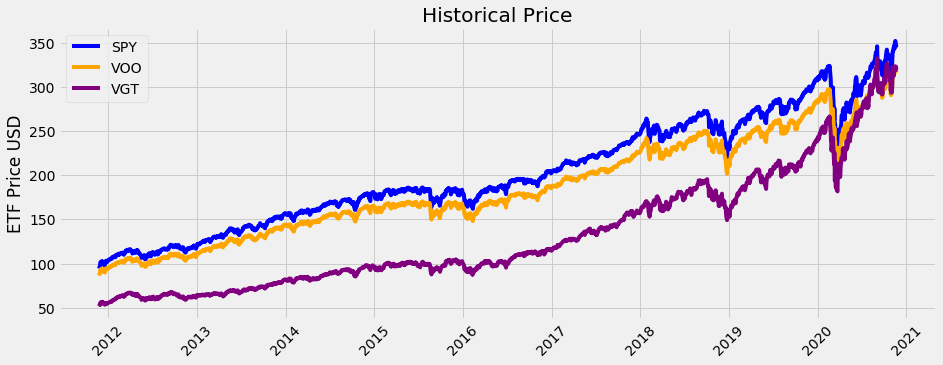

In [4]:
#plot the data
plt.figure(figsize=(14,5))
plt.plot(np.array(df.index),np.array(df['SPY'].values),label='SPY',color='blue')
plt.plot(np.array(df.index),np.array(df['VOO']),label='VOO',color='orange')
plt.plot(np.array(df.index),np.array(df['VGT']),label='VGT',color='purple')
plt.ylabel('ETF Price USD')
plt.legend()
plt.title('Historical Price')
plt.xticks(rotation=45)
plt.show()

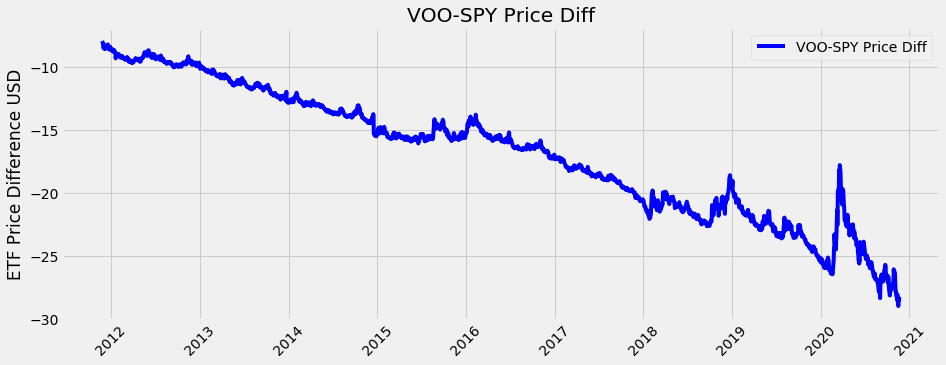

In [5]:
df['VOO-SPY Price Diff']=df['VOO']-df['SPY']
#plot the Data
plt.figure(figsize=(14,5))
plt.plot(np.array(df.index),np.array(df['VOO-SPY Price Diff'].values),label='VOO-SPY Price Diff',color='blue')
plt.ylabel('ETF Price Difference USD')
plt.legend()
plt.title('VOO-SPY Price Diff')
plt.xticks(rotation=45)
plt.show()

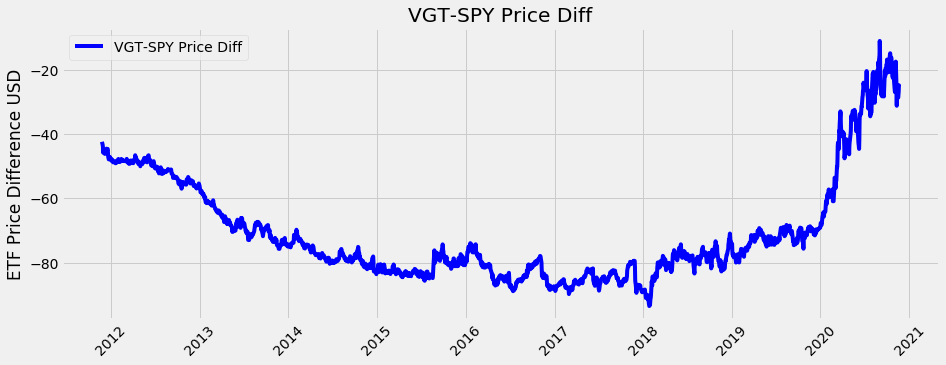

In [6]:
df['VGT-SPY Price Diff']=df['VGT']-df['SPY']
#plot the Data
plt.figure(figsize=(14,5))
plt.plot(np.array(df.index),np.array(df['VGT-SPY Price Diff'].values),label='VGT-SPY Price Diff',color='blue')
plt.ylabel('ETF Price Difference USD')
plt.legend()
plt.title('VGT-SPY Price Diff')
plt.xticks(rotation=45)
plt.show()

In [7]:
daily_simple_returns=df[['SPY','VOO','VGT']].pct_change(1)
daily_simple_returns

,SPY,VOO,VGT
2011-11-25,NaN,NaN,NaN
2011-11-28,0.028967,0.029915,0.034252
2011-11-29,0.002840,0.002923,-0.005961
2011-11-30,0.041150,0.040983,0.040480
2011-12-01,-0.000160,-0.000700,0.005123
...,...,...,...
2020-11-16,0.012482,0.012127,0.009838
2020-11-17,-0.005378,-0.004985,-0.002892
2020-11-18,-0.012035,-0.012132,-0.010412
2020-11-19,0.004210,0.004185,0.010953


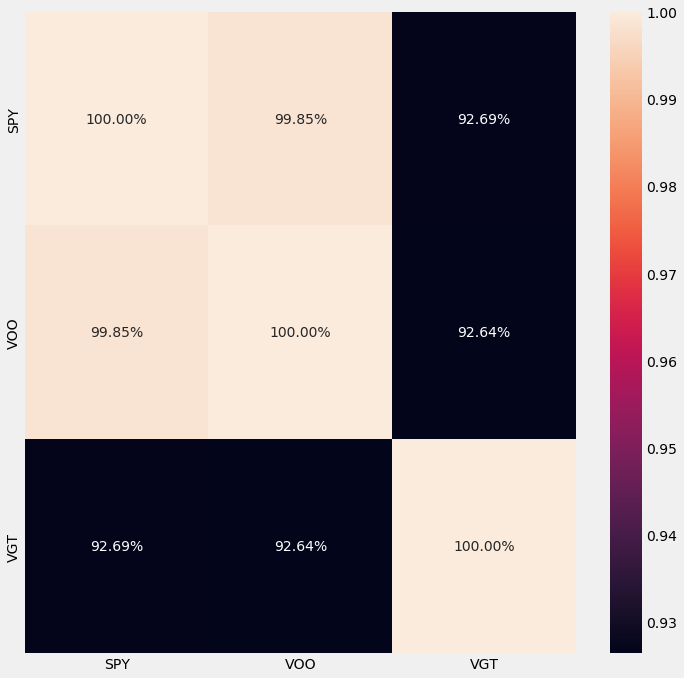

In [8]:
#Show the correlation
plt.subplots(figsize=(11,11))
sns.heatmap(daily_simple_returns.corr(),annot=True,fmt='.2%')

In [9]:
#Get the covariance
daily_simple_returns.cov()

,SPY,VOO,VGT
SPY,0.000109,0.000110,0.000125
VOO,0.000110,0.000112,0.000127
VGT,0.000125,0.000127,0.000167


In [10]:
#Get the Variance
daily_simple_returns.var()

SPY    0.000109
VOO    0.000112
VGT    0.000167
dtype: float64

In [11]:
#Get Volatility
daily_simple_returns.std()

SPY    0.010445
VOO    0.010592
VGT    0.012934
dtype: float64

In [12]:
#Show the mean or average daily simple return
daily_simple_returns.mean()*100

SPY    0.062830
VOO    0.063070
VGT    0.088821
dtype: float64

In [13]:
#Annualize returns
daily_simple_returns.mean()*100*152

SPY     9.550151
VOO     9.586641
VGT    13.500854
dtype: float64